In [1]:
'''
SCRIPT PER PROVARE configurazioni SVM
'''

import time
t_orig = time.process_time()
last_time = 0

import warnings
warnings.simplefilter("ignore")

import codecs
import csv
import argparse
import os
import numpy as np
import pickle
import pandas as pd

from matplotlib import pyplot as plt
from time import time
#from dill import dill
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import cross_validation, svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree.tree import DecisionTreeClassifier
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# modulo per confrontare il risultato delle regex
# richiede entrambi i db già etichettati
import tortellino_parmigiano 
import crea_db


import evaluation_report # stampa confusion_matrix e altro
from text_tokenizer import get_tokenizer 
from nltk.stem.snowball import ItalianStemmer

/home/utente_locale/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
ita_stopwords = set(stopwords.words('italian'))
ita_stemmer = ItalianStemmer()
ita_stemming = ita_stemmer.stem
def get_tokenizer1(doc): #(word_ngrams=None, char_ngrams=None, stopwords=None, additional_extractors=None):
    # rimuove le stopwords
    doc = filter(lambda x: x not in ita_stopwords, word_tokenize(doc))
    # stemma le parole
    doc = [ita_stemmer.stem(a) for a in doc]
    return doc

def get_tokenizer(doc): #(word_ngrams=None, char_ngrams=None, stopwords=None, additional_extractors=None):
    doc = filter(lambda x: x not in ita_stopwords, word_tokenize(doc))
    #doc = map(ita_stemming, doc)
    #doc = [ita_stemmer.stem(a) for a in doc]
    temp = ''
    for par in doc:
        temp = '{} {}'.format(temp, ita_stemming(par))
    return temp

In [3]:
# class CestinoTraining:
#     def __init__(self, features, labels, categories):
#         self.stemmed = list(map(get_tokenizer, texts))
#         self.features = features
#         self.labels = np.array(labels)
#         self.categories = categories

In [3]:
DATA_FOLDER = "/home/backup/dati_e_csv/" # DATI
# ci assicuriamo siano presenti i DB
training_db_name = crea_db.build_training(OUTPUT=DATA_FOLDER)
test_db_name = crea_db.build_test(OUTPUT=DATA_FOLDER) ################################
PATH = '/home/backup/dati_e_csv/training_stemmed.pickle'
    
if os.path.exists(PATH):
    print('Trovato salvataggio training set')
#     with open('/home/backup/dati_e_csv/training_stemmed.pickle', 'rb') as file:
#         salvataggio = pickle.load(file)
#     texts = salvataggio.features
#     texts_stemmed = salvataggio.stemmed
#     Y = salvataggio.labels
    salvataggio = pd.read_pickle(PATH)
    etichette = salvataggio[
        salvataggio.columns.difference(['testo', 'testo_stemmato'])].columns.values.tolist()
    print('Salvataggio caricato')
else:
    print('Creo il training set')
    
    texts = list()
    labels = list()
    names= []

    # load training dataset # possiamo usare sqlite
    with codecs.open(os.path.join(DATA_FOLDER, training_db_name), 'r', errors='ignore') as file:
        reader = csv.reader(file, delimiter=';')
        etichette = next(reader)
        for row in reader:
            # load documents
            #print('Nome {}, etichette {}, conversazione{}'.format(row[10], row[:10], row[11]+row[12]))
            #raise SystemExit
            unito = (row[11]+row[12]).replace('#O:', '').replace('#C:', '') #concatena il testo cliente con operatore
            texts.append(unito)
            # load row name
            names.append(row[10])
            # load labels
            labels.append(list(map(lambda x: int(x), row[:10])))

    print('dimensioni:',len(texts), len(labels))
    # tokenization function # possiamo usare anche solo un canale cliente/operatore
    print('Inizio lo stemming')
    etichette = etichette[:10]
    salvataggio = pd.DataFrame()
    salvataggio['testo'] = texts
    salvataggio[etichette] = pd.DataFrame(labels)
    salvataggio['testo_stemmato'] = pd.Series(list(map(get_tokenizer, texts)))
    print('Training set creato e salvato')
    
    # save DataFrame
    salvataggio.to_pickle(PATH)
    
#     salvataggio = CestinoTraining(texts, Y, etichette)
#     texts_stemmed = salvataggio.stemmed
#     Y = salvataggio.labels
#     with open('/home/backup/dati_e_csv/training_stemmed.pickle', 'wb') as file:
#         pickle.dump(salvataggio, file, protocol=0)

Training sqlite e csv presenti!
Test sqlite e csv presenti!
Trovato salvataggio training set
Salvataggio caricato


In [82]:
algo = LinearSVC(C=20, class_weight={0:0.2,1:1}) #C=9
count_vect = CountVectorizer(analyzer='word', max_df=0.6,min_df=0,max_features=1000)
tfidf = TfidfTransformer(use_idf=True)

print('Algoritmo pronto per essere fittato')

Algoritmo pronto per essere fittato


In [42]:
print(texts[1], len(texts))
print(texts_stemmed[1], len(texts_stemmed))

  sì  hanno hanno inviato documentazioni fonte signora  numero cliente vediamo signora  non ho il numero cliente  al  senza essere persone nella  il ministro con tutto toccata  perché allora nella documentazione che lei abbia inviato  risultava barche non vi era correttamente compilata  marcato alla Castelli fiscale su questa delicata  è molto  estremo non ce l' ho ancora signora questa anzi mi serve il venticinque di agosto  allora no signora lì di fronte a stare domani pomeriggio sul tasti perché i documenti lender lavorasse nel giro di quarantotto ore  quindi vedete ricontattare domani verso il tardi per vedere se sono pervenuti i documenti  va bene  io non ce l' ho ancora  non c'è ancora tutta  no con il nono bis signora non non non c'è proprio  non lo so signora io non lo vedo  grazie buongiorno  non c'è concorrenza  più o meno come fare la pratica perché è un po' di giorni ti aspetto  sì presa fatto tutto ha mandato il fax e avremo compilato un po' in  Como ottenendo Torino alle 

In [5]:
# import pandas as pd
# score_matrix = gs.cv_results_
# df = pd.DataFrame(score_matrix)
# df

In [6]:
salvataggio.head()

,testo,attivazione,canone rai,cessazione,contratto,credito,domiciliazione,fatturazione,gr-invito a chiamare - focus,non di competenza,richiamate,testo_stemmato
0,sono geloso macchina perché che questo mi ...,0,0,0,0,1,0,0,1,0,0,gelos macchin dann numer nient quand prossim ...
1,sì hanno hanno inviato documentazioni fonte...,0,0,0,0,0,0,0,1,0,0,sì invi document font signor numer client ved...
2,io la sento malissimo sì ma la bolletta il...,0,0,0,0,0,0,0,0,0,0,sent malissim sì bollett numer civic dic codi...
3,spetti si senta lei si esprime ma il moti...,0,0,0,0,1,0,0,1,0,1,spett sent esprim mot collett dic volt chiam ...
4,sì per attivare che il contratto segnalasse...,0,0,0,0,0,0,0,1,0,0,sì attiv contratt segnal ' abit richiest può ...


In [83]:
# controlla se esiste il modello per evitare di ricrearlo ogni volta
colonna = 'canone rai'

doc_term = count_vect.fit_transform(salvataggio.testo_stemmato)
doc_idf = tfidf.fit_transform(doc_term)
algo.fit(doc_idf, salvataggio[colonna])
print('Modello creato, verifico il test set')

import time
print('Time to load/create the model: ', time.process_time()-last_time)
last_time = time.process_time()

Modello creato, verifico il test set
Time to load/create the model:  23.277729189000013


In [73]:
# importo il test set per la valutazione del modello
unito_test = []
#label_names = []
test_texts = list()
test_labels = list()
#raise SystemExit

# load test data
# carica il test set
with codecs.open(os.path.join(DATA_FOLDER, test_db_name), 'r', errors='ignore') as file:
    reader = csv.reader(file, delimiter=';')
    etichette = next(reader)[3:]
    print(etichette)
    for row in reader:
        # load documents
        test_texts.append((row[1]+row[2]).replace('O:', '').replace('C:', ''))
        # load names
        #names_test.append(row[0])
        # load labels
        test_labels.append(list(map(lambda x: int(x),row[-10:])))
        
X_test = list(map(get_tokenizer, test_texts))
print('ok')

['attivazione', 'canone rai', 'cessazione', 'contratto', 'credito', 'domiciliazione', 'fatturazione', 'gr-invito a chiamare - focus', 'non di competenza', 'richiamate']
ok


In [84]:
# apply model to data
Y_test = pd.DataFrame(test_labels, columns=etichette)
Y_test[colonna].head()

test_doc_term = count_vect.transform(X_test)
test_doc_idf = tfidf.transform(test_doc_term)
predicted_labels = algo.predict(test_doc_idf) #np_array

print(Y_test.shape)
# print evaluation report
print('Confusion matrix:')
print(confusion_matrix(Y_test[colonna], predicted_labels))
#evaluation_report.print_evaluation(Y_test[colonna], predicted_labels)
# conta quante etichette sono state messe
print(colonna, np.sum(predicted_labels))
print('Decision function: ')

#scores = algo.decision_function(test_texts) #np_array

print('\n')
print('accuracy', accuracy_score(Y_test[colonna], predicted_labels))
print('precision micro',precision_score(Y_test[colonna], predicted_labels, average='micro') )
print('recall micro',recall_score(Y_test[colonna], predicted_labels, average='micro'))
print('f1 micro', f1_score(Y_test[colonna], predicted_labels, average='micro'))
print('precision macro', precision_score(Y_test[colonna], predicted_labels, average='macro') )
print('recall macro', recall_score(Y_test[colonna], predicted_labels, average='macro'))
print('f1 macro', f1_score(Y_test[colonna], predicted_labels, average='macro'))


(424, 10)
Confusion matrix:
[[360   1]
 [ 50  13]]
canone rai 14
Decision function: 


accuracy 0.879716981132
precision micro 0.879716981132
recall micro 0.879716981132
f1 micro 0.879716981132
precision macro 0.90331010453
recall macro 0.601789561623
f1 macro 0.63575723887


In [85]:
# on training set
Y_test = salvataggio[colonna]
# apply model to data

test_doc_term = count_vect.transform(salvataggio.testo_stemmato)
test_doc_idf = tfidf.transform(test_doc_term)
predicted_labels = algo.predict(test_doc_idf) #np_array

print(Y_test.shape)
# print evaluation report
print('Confusion matrix:')
print(confusion_matrix(Y_test, predicted_labels))
#evaluation_report.print_evaluation(Y_test[colonna], predicted_labels)
# conta quante etichette sono state messe
print(colonna, np.sum(predicted_labels))
print('Decision function: ')

#scores = algo.decision_function(test_texts) #np_array

print('\n')
print('accuracy', accuracy_score(Y_test, predicted_labels))
print('precision micro',precision_score(Y_test, predicted_labels, average='micro') )
print('recall micro',recall_score(Y_test, predicted_labels, average='micro'))
print('f1 micro', f1_score(Y_test, predicted_labels, average='micro'))
print('precision macro', precision_score(Y_test, predicted_labels, average='macro') )
print('recall macro', recall_score(Y_test, predicted_labels, average='macro'))
print('f1 macro', f1_score(Y_test, predicted_labels, average='macro'))


(24379,)
Confusion matrix:
[[23060   361]
 [  131   827]]
canone rai 1188
Decision function: 


accuracy 0.979818696419
precision micro 0.979818696419
recall micro 0.979818696419
f1 micro 0.979818696419
precision macro 0.845239601541
recall macro 0.923921633593
f1 macro 0.880090515832


In [86]:
row_names = list(count_vect.vocabulary_)
print(row_names[:5])
coeffici = pd.Series(algo.coef_[0,:], index=row_names)
#coeffici.set_index(keys=row_names)
print(coeffici.loc['rai'])
coeffici.sort_values(ascending=True).head(100)


['applic', 'tranquill', 'cinquantaquattr', 'perfett', 'essa']
-0.361947541892


chiam        -3.879182
modulist     -3.520678
mont         -3.380078
prim         -3.370666
nomin        -3.352600
dire         -2.930894
mic          -2.920251
stess        -2.833835
mogl         -2.785191
utenz        -2.777204
certific     -2.451139
mater        -2.447454
appart       -2.331858
diciassett   -2.257702
ventisett    -2.187056
atto         -2.153422
empol        -2.140674
pagh         -2.086127
energ        -2.080207
novecent     -2.052696
ministr      -2.049924
possibil     -2.033973
accett       -2.026272
funzion      -2.014571
serviz       -2.013049
fat          -1.975864
mot          -1.930702
period       -1.924236
oper         -1.919306
general      -1.916963
                ...   
rientr       -1.324536
amic         -1.320192
causal       -1.314565
letter       -1.302337
contest      -1.302027
catan        -1.287094
star         -1.286931
poss         -1.285857
me           -1.275873
anagraf      -1.265681
distacc      -1.259494
regolar      -1.245616
tratt      

156 156
media score positivi:    1.98479949207
media score negativi:    -0.129678476263
std score positivi:      1.72169001482
std score negativi:      1.31721210827


In [28]:
# confronto gli error rate per ciascuna classe
# predico il training set
Y_pred_train = model.predict(texts)

accuracy_test = []
accuracy_train = []
for i in range(predicted_labels.shape[1]):
    accuracy_test.append(accuracy_score(Y_test[:,i], predicted_labels[:,i]))
    accuracy_train.append(accuracy_score(Y[:,i], Y_pred_train[:,i]))
    

print ('error rate:')
print('{:>35} {:>10}'.format('test','train'))
for n in range(len(etichette[:10])):
      print('{:>23}{:>12}{:>10}'.format(etichette[n], round(1-accuracy_test[n],3), round(1-accuracy_train[n],3)))
    
print('''
    COME INTERPRETARE:
    
    Training error is low but is much lower than testing error - overfitting
    Both errors are low - ok
    Both errors are high - underfitting
    Training error is high but testing is low - error in implementation or very small dataset
''')

error rate:
                               test      train
            attivazione       0.167     0.051
             canone rai       0.125     0.016
             cessazione       0.028     0.017
              contratto       0.163     0.087
                credito       0.267     0.129
         domiciliazione       0.057     0.019
           fatturazione       0.302     0.126
gr-invito a chiamare - focus        0.46      0.13
      non di competenza       0.108     0.023
             richiamate       0.059     0.087

    COME INTERPRETARE:
    
    Training error is low but is much lower than testing error - overfitting
    Both errors are low - ok
    Both errors are high - underfitting
    Training error is high but testing is low - error in implementation or very small dataset



selected_features: 10 90906
(24379, 90906)


Riduco le dimensioni


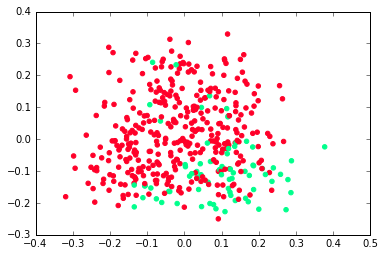

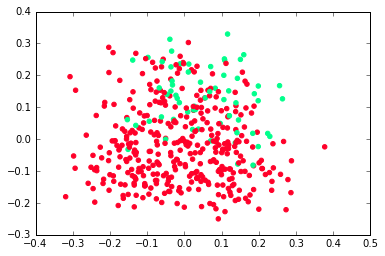

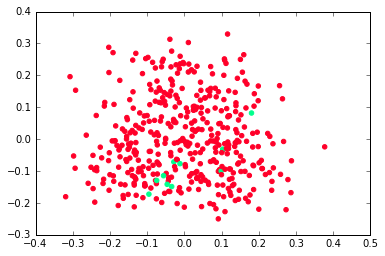

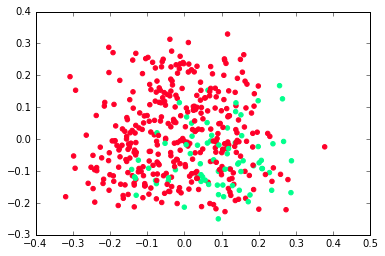

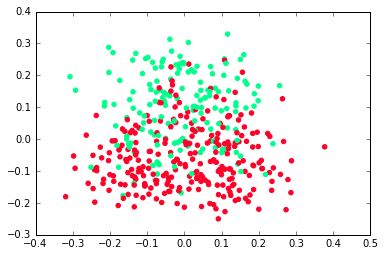

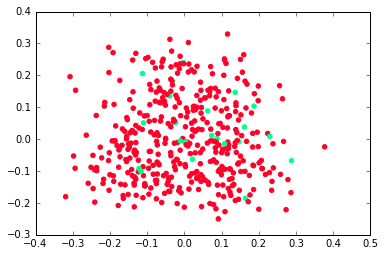

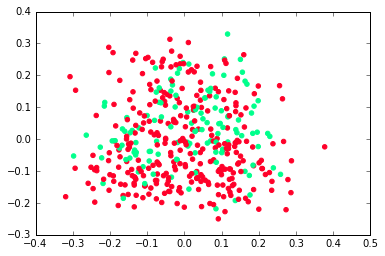

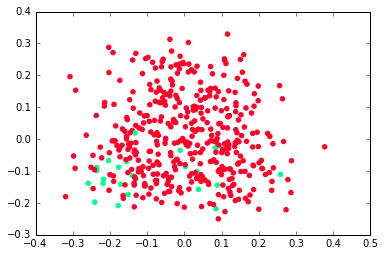

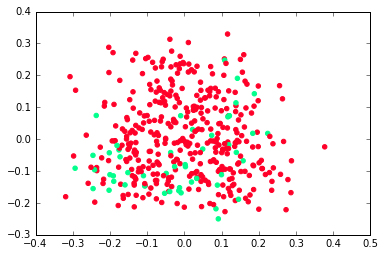

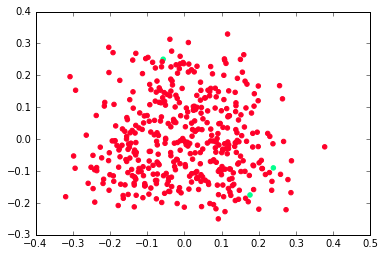

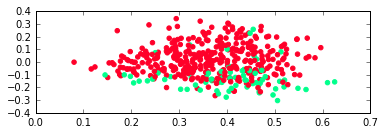

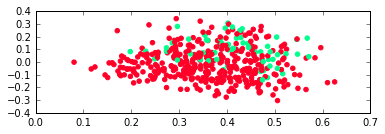

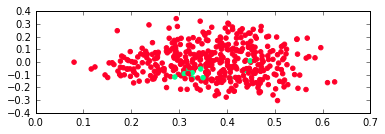

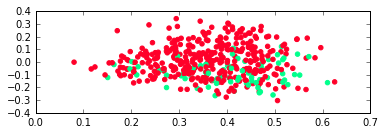

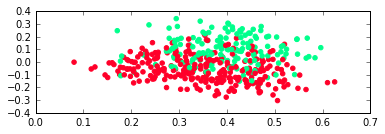

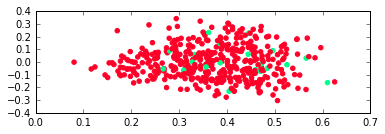

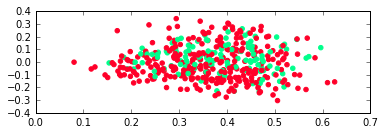

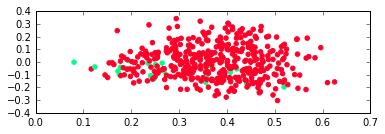

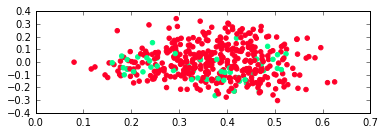

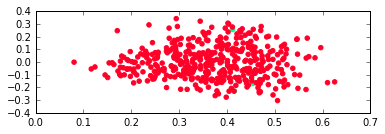

In [16]:
# PLOT

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm

# produce visualization
# reduce dimensions
print('Riduco le dimensioni')
reducer = TruncatedSVD() # PCA(n_components=2) #
X = TfidfTransformer(use_idf=True).fit_transform(
                    CountVectorizer(analyzer='word', max_df=0.6,
                    min_df=0,max_features=1000).fit_transform(test_texts))

y = reducer.fit_transform(X.toarray())

y = PCA(n_components=2).fit_transform(X.toarray())
y_pca = reducer.fit_transform(X.toarray())

# print('Disegno il grafico')

# labels = Y_test[:,1]
# colors = ['blue', 'red']#[cm.gist_rainbow(float(label) / 5) for label in labels]

# plotx = y[:, 0]
# ploty = y[:, 1]

# fig = plt.figure()

# # 2d plot
# subplot = fig.add_subplot(111)
# #subplot.title(k)
# subplot.scatter(plotx, ploty, color=colors)
# if False: # plot labels in graph
#     for id_, x, y in zip(ids, plotx, ploty):
#         subplot.annotate(id_, (x, y))
        
# print('Disegno il grafico')
# reducer = PCA(n_components=2)
# y = reducer.fit_transform(X.toarray())
# labels = Y_test[:,1]
# colors = ['blue', 'red']#[cm.gist_rainbow(float(label) / 5) for label in labels]

# plotx = y[:, 0]
# ploty = y[:, 1]

# fig = plt.figure()

# # 2d plot
# subplot = fig.add_subplot(111)
# #subplot.title(k)
# subplot.scatter(plotx, ploty, color=colors)
# if False: # plot labels in graph
#     for id_, x, y in zip(ids, plotx, ploty):
#         subplot.annotate(id_, (x, y))

# assign a color to each label
#print('Disegno il grafico')
for i, k in enumerate(etichette):
    labels = Y_test[:,i]
    colors = [cm.gist_rainbow(float(label) / 2.) for label in labels]

    plotx = y[:, 0]
    ploty = y[:, 1]

    fig = plt.figure()

    # 2d plot
    subplot = fig.add_subplot(111)
    #subplot.title(k)
    subplot.scatter(plotx, ploty, color=colors)
    if False: # plot labels in graph
        for id_, x, y in zip(ids, plotx, ploty):
            subplot.annotate(id_, (x, y))
            
for i, k in enumerate(etichette):
    labels = Y_test[:,i]
    colors = [cm.gist_rainbow(float(label) / 2.) for label in labels]

    plotx = y_pca[:, 0]
    ploty = y_pca[:, 1]

    # 2d plot
    subplot = fig.add_subplot(211)
    #subplot.title(k)
    subplot.scatter(plotx, ploty, color=colors)
    if False: # plot labels in graph
        for id_, x, y in zip(ids, plotx, ploty):
            subplot.annotate(id_, (x, y))
plt.show()